In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covertype-forest-cover-types/covertype.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("/kaggle/input/covertype-forest-cover-types/covertype.csv")

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


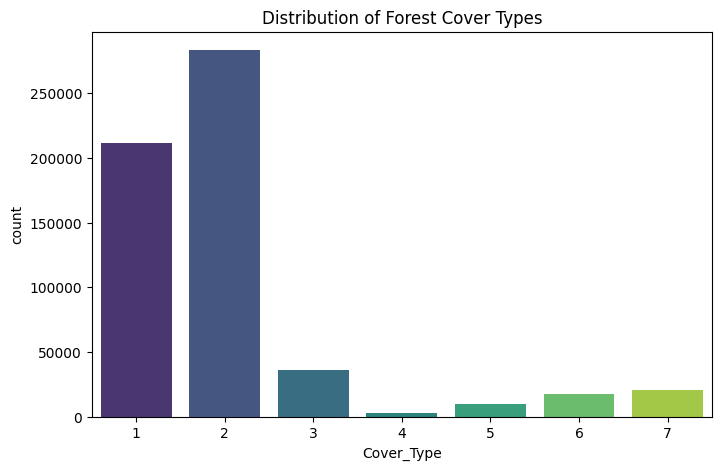

Cover_Type
2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cover_Type', data=df, palette='viridis')
plt.title("Distribution of Forest Cover Types")
plt.show()

print(df['Cover_Type'].value_counts(normalize=True)*100)


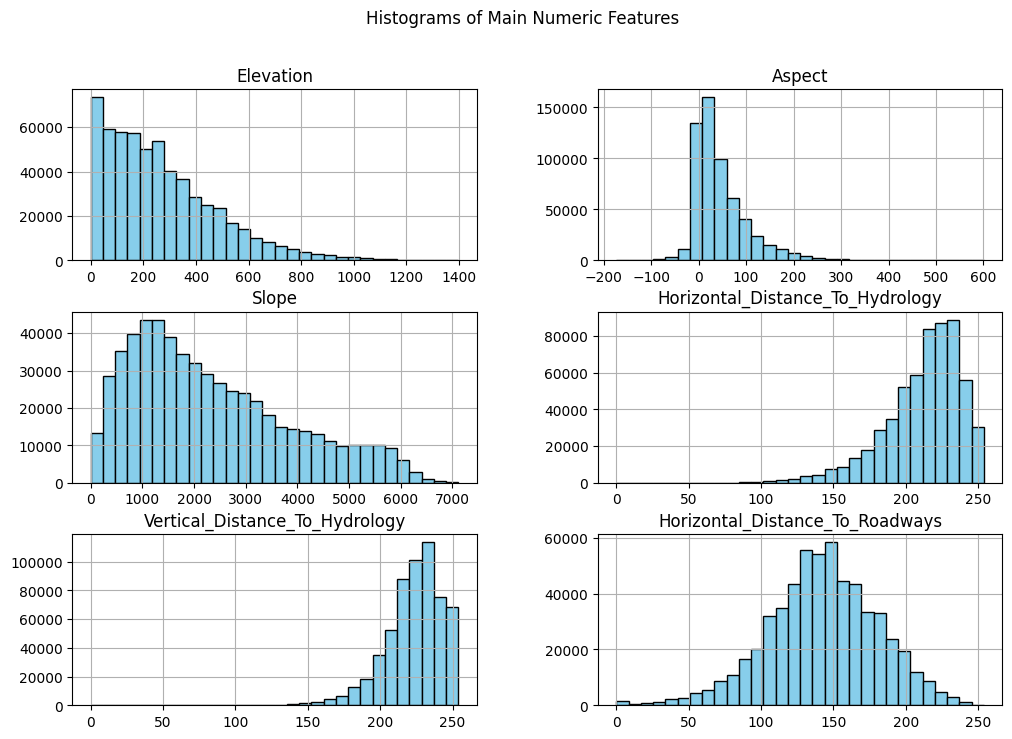

In [5]:
numeric_features = ['Elevation', 'Aspect', 'Slope', 
                    'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology',
                    'Horizontal_Distance_To_Roadways']

df[numeric_features].hist(bins=30, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Main Numeric Features")
plt.show()


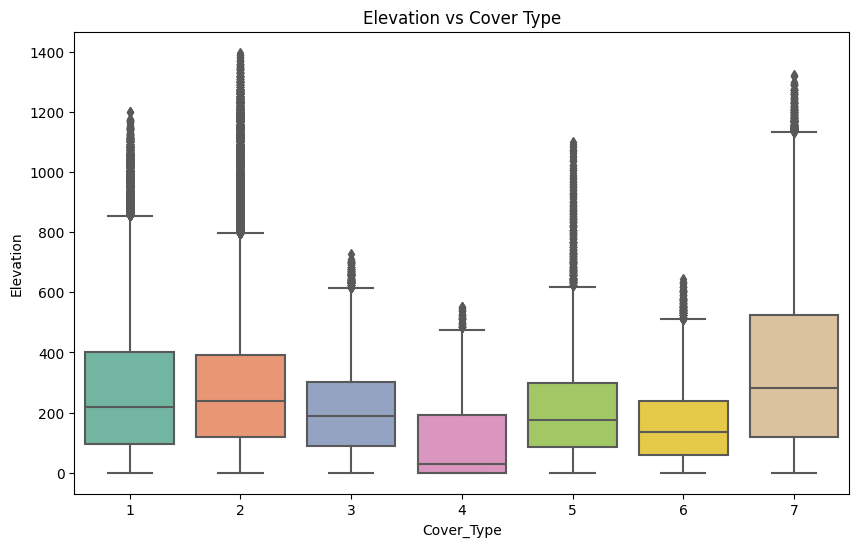

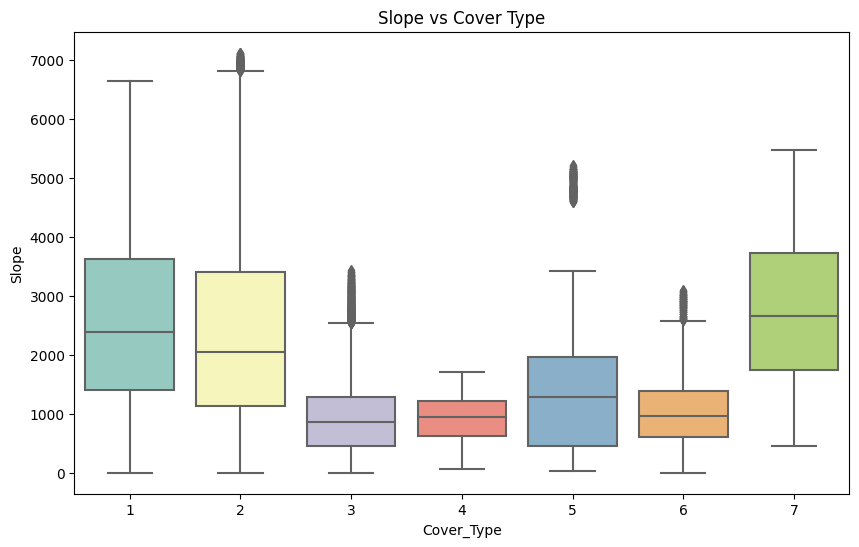

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette='Set2')
plt.title("Elevation vs Cover Type")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Slope', data=df, palette='Set3')
plt.title("Slope vs Cover Type")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

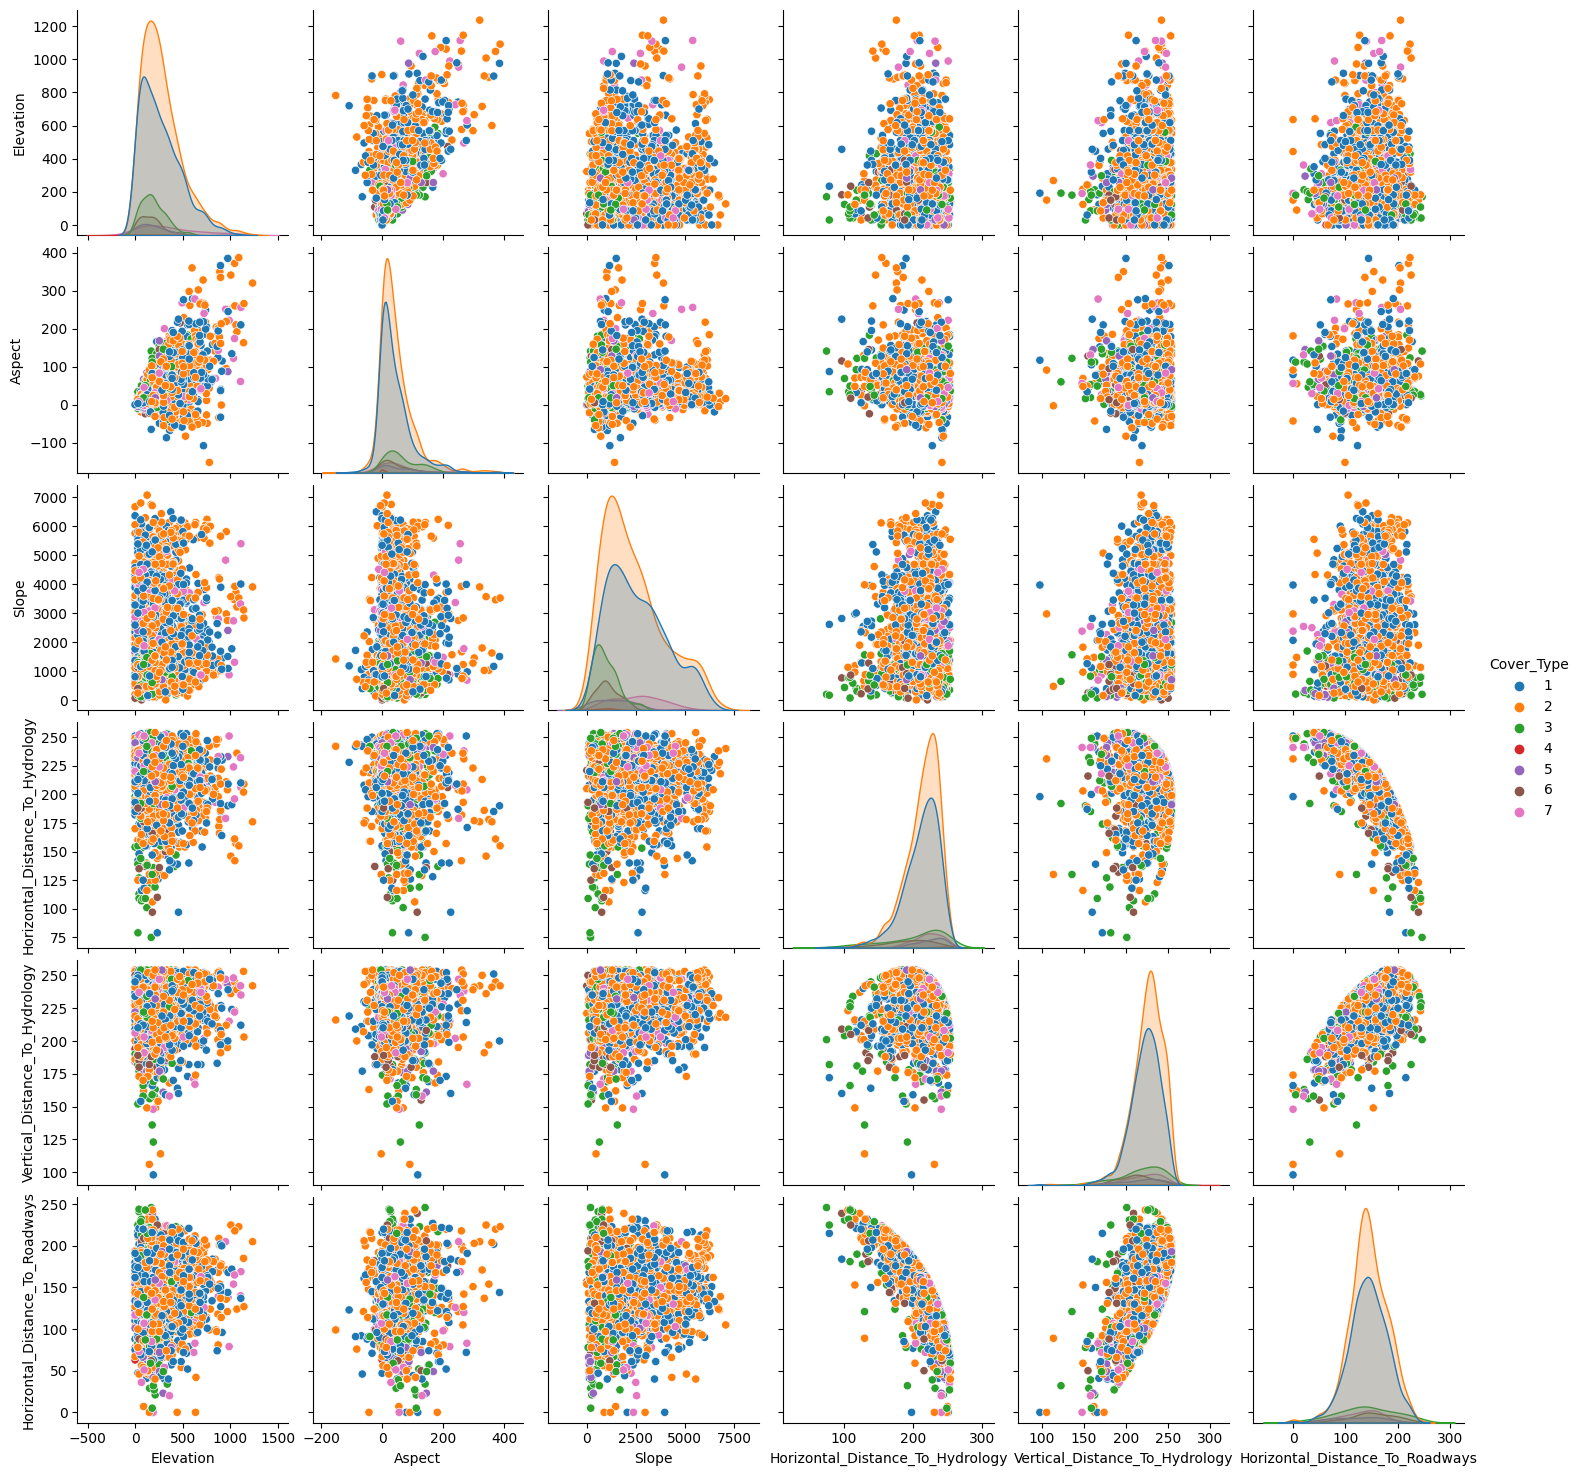

In [7]:
sample_df = df.sample(2000, random_state=42)
sns.pairplot(sample_df[numeric_features + ['Cover_Type']], hue='Cover_Type', palette='tab10')
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Cover_Type"] = le.fit_transform(df["Cover_Type"])

In [9]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [12]:

# XGBoost model
xgb = XGBClassifier(
    eval_metric="mlogloss",
    random_state=42
)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

===== Random Forest =====
Accuracy: 0.9546
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.91      0.85      0.88       549
           4       0.95      0.78      0.86      1899
           5       0.94      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203

===== XGBoost =====
Accuracy: 0.8696
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      189

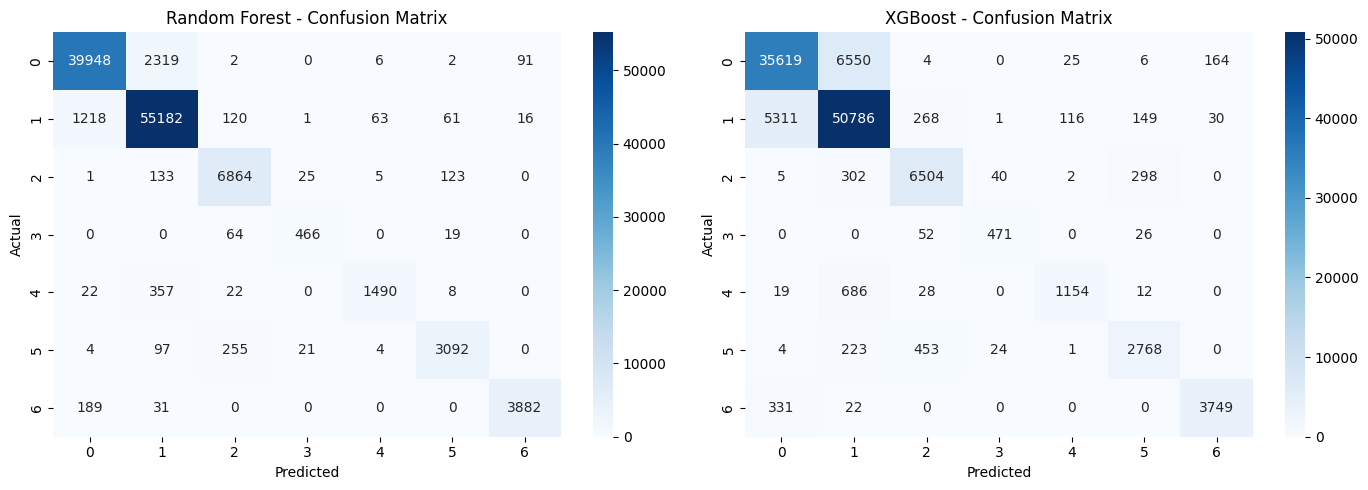

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Random Forest": rf,
    "XGBoost": xgb
}

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, (name, model) in enumerate(models.items()):
    #predict
    y_pred = model.predict(X_test)
    
    #Evaluation
    acc = accuracy_score(y_test, y_pred)
    print(f"===== {name} =====")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


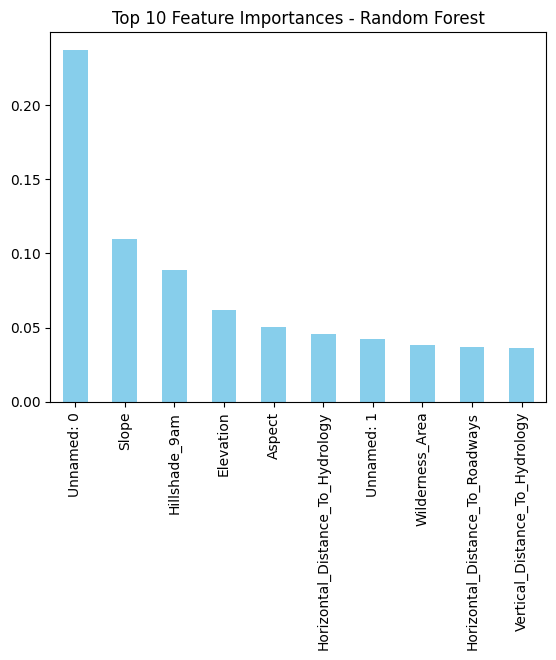

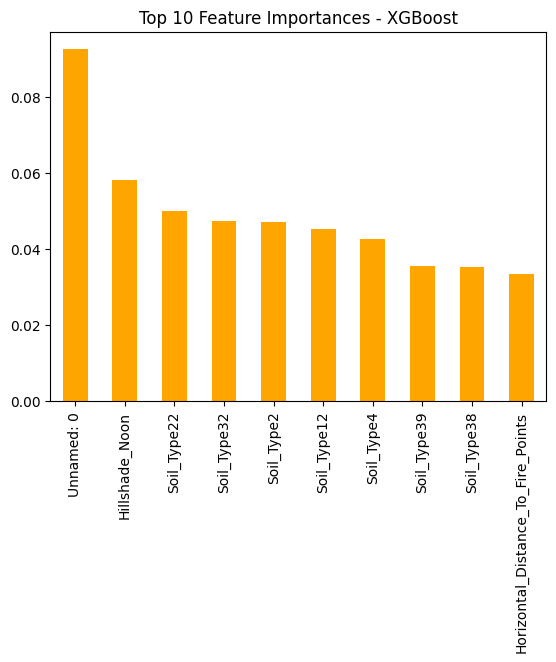

In [14]:
# RF
feat_imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp_rf[:10].plot(kind='bar', color='skyblue')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()

# XGB
feat_imp_xgb = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp_xgb[:10].plot(kind='bar', color='orange')
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best RF Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Best RF CV Accuracy: 0.8894281902919658
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best XGB Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best XGB CV Accuracy: 0.8790841313877005

===== Random Forest =====
Accuracy: 0.9451907437845839
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.95      0.95     56661
           2       0.92      0.94      0.93      7151
           3       0.79      0.92      0.85       549
           4       0.86      0.89      0.88      1899
           5       0.85      0.91      0.88      3473
           6       0.94      0.97      0.95      4102

    accuracy                           0.95    116203
   mac

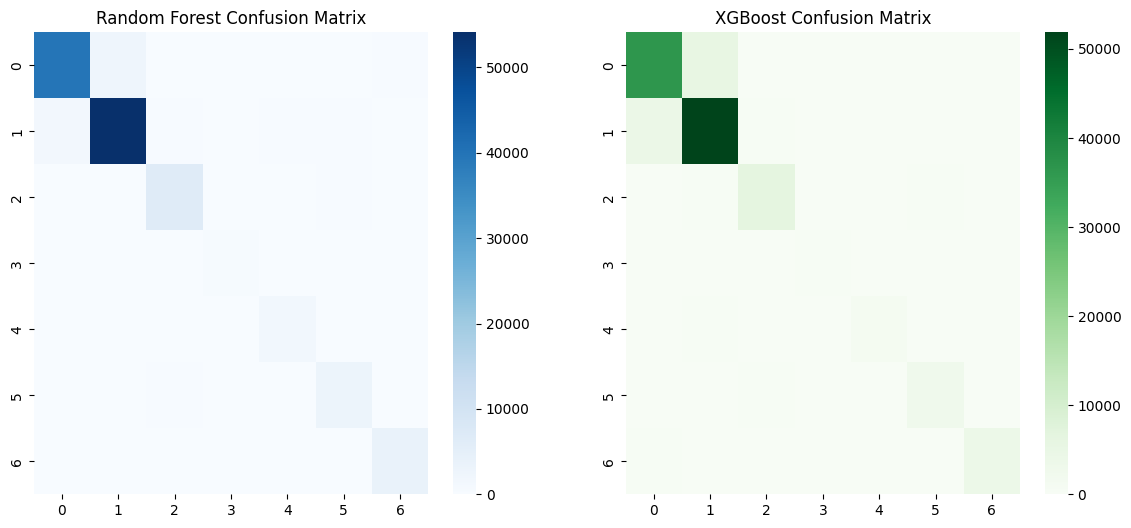

In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 1. Sample 30% of the data
# ==========================
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.7, stratify=y, random_state=42)

# ==========================
# 2. Random Forest Tuning
# ==========================
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_random = RandomizedSearchCV(
    rf, param_distributions=rf_params, 
    n_iter=5, cv=2, scoring='accuracy', 
    verbose=1, n_jobs=-1, random_state=42
)
rf_random.fit(X_sample, y_sample)
print("Best RF Params:", rf_random.best_params_)
print("Best RF CV Accuracy:", rf_random.best_score_)

# ==========================
# 3. XGBoost Tuning
# ==========================
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False, random_state=42)
xgb_random = RandomizedSearchCV(
    xgb, param_distributions=xgb_params, 
    n_iter=5, cv=2, scoring='accuracy', 
    verbose=1, n_jobs=-1, random_state=42
)
xgb_random.fit(X_sample, y_sample)
print("Best XGB Params:", xgb_random.best_params_)
print("Best XGB CV Accuracy:", xgb_random.best_score_)

# ==========================
# 4. Train best models on full data
# ==========================
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

best_rf = RandomForestClassifier(**rf_random.best_params_, class_weight='balanced', random_state=42)
best_rf.fit(X_train_full, y_train_full)
rf_preds = best_rf.predict(X_test_full)

best_xgb = XGBClassifier(**xgb_random.best_params_, eval_metric="mlogloss", use_label_encoder=False, random_state=42)
best_xgb.fit(X_train_full, y_train_full)
xgb_preds = best_xgb.predict(X_test_full)

# ==========================
# 5. Compare Results
# ==========================
print("\n===== Random Forest =====")
print("Accuracy:", accuracy_score(y_test_full, rf_preds))
print(classification_report(y_test_full, rf_preds))

print("\n===== XGBoost =====")
print("Accuracy:", accuracy_score(y_test_full, xgb_preds))
print(classification_report(y_test_full, xgb_preds))

# Confusion Matrix Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(confusion_matrix(y_test_full, rf_preds), annot=False, cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")

sns.heatmap(confusion_matrix(y_test_full, xgb_preds), annot=False, cmap="Greens", ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix")
plt.show()
